In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



### Need Labeled Data
- Historical data with labels
- Experiments to get labeled data (e.g. A/B testing)
- Crowd-sourcing label data

# Chapter 1: Classification

## The Iris dataset in scikit-learn

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
iris = datasets.load_iris()
type(iris) # Bunch --> Similar to dictionary which is contain key and value pairs

sklearn.utils.Bunch

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [5]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Exploratory data analysis (EDA)

In [8]:
x = iris.data
y = iris.target
df = pd.DataFrame(x, columns = iris.feature_names)
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


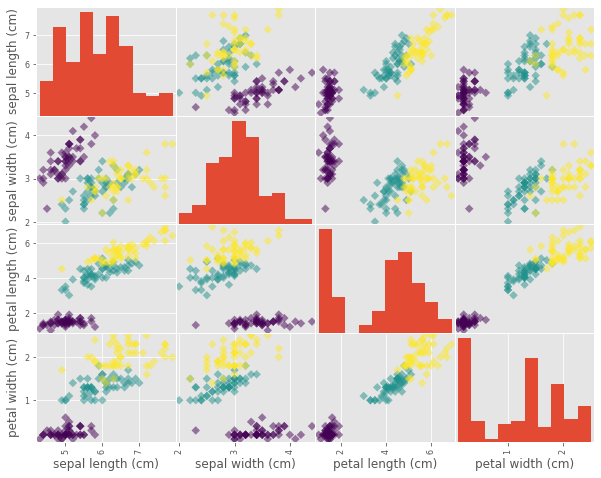

In [9]:
scatter_matrix = pd.plotting.scatter_matrix(df,c=y,figsize= [10,8] , marker='D')

Petal length and petal width are highly correlated, you can see that flowers are clustered according to species.

## k-Nearest Neighbors
- Basic idea: Predict the label of a data point by
    - Looking at the 'k' closest labeled data points
    - Taking a majority vote
    
- K-NN does make decision boundaries!

## Using scikit-learn to fit a classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target']) # Input could numpy array, or pandas dataframe

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

In [11]:
iris['data'].shape, iris['target'].shape # Must be the same length (rows) !

((150, 4), (150,))

## Predicting on Unlabeled data

In [12]:
X_new = np.array([[5.6,2.8,3.9,1.1], [5.7,2.6,3.8,1.3], [4.7,3.2,1.3,0.2]])
prediction = knn.predict(X_new)
print('Prediction: {}'.format(prediction))

Prediction: [1 1 0]


## Measuring model Performance
- Which data should be used to compute accuracy?
- How well will the model perform on new data?
- Split data into training and test set to see how well the model perform on new data !

In [13]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Test set predictions: \\n {}".format(y_pred))

Test set predictions: \n [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [14]:
knn.score(X_test,y_test)

0.9555555555555556

### Model Complexity
1. Larger k = smoother decision boundary = less complex model
2. Smaller k = more complex model = can lead to overfitting

#### Model Complexity Curve how to plot?

In [15]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,n in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test,y_test)
    

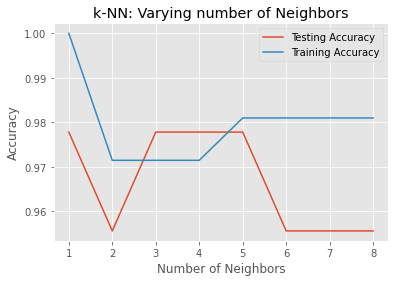

In [16]:
plt.title('k-NN: Varying number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Chapter 2:  Regression 

In [17]:
from sklearn import datasets
boston = datasets.load_boston()
boston_ = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_['MEDV'] = boston.target
boston_.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Creating feature and target arrays

In [18]:
X = boston_.drop('MEDV', axis=1).values
y = boston_['MEDV'].values

### Predicting house value from a single feature

In [19]:
X_rooms = X[:,5]
type(X_rooms), type(X)

(numpy.ndarray, numpy.ndarray)

In [20]:
X_rooms.shape, y.shape

((506,), (506,))

In [21]:
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)
X_rooms.shape, y.shape

((506, 1), (506, 1))

### Plotting house value vs. number of rooms

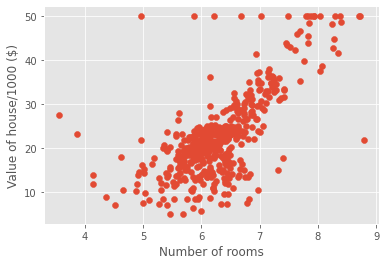

In [22]:
plt.scatter(X_rooms,y)
plt.ylabel('Value of house/1000 ($)')
plt.xlabel('Number of rooms')
plt.show();

### Fitting a regression model

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms,y)
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

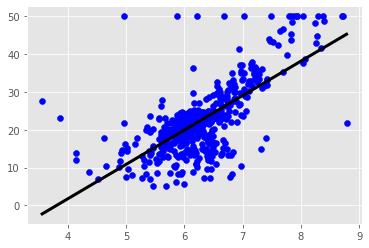

In [24]:
plt.scatter(X_rooms, y, color='blue')
plt.plot(prediction_space, reg.predict(prediction_space), color='black', linewidth=3)
plt.show()

## Regression Mechanics
- y = ax+b
    - y = target
    - x = single feature
    - a,b = parameters of model --> that we want to learn
    
- How do we choose a and b ?
- Define an error functions for any given line
    - Choose the line that minimizes the error function (also called cost function or loss function)
    
### The loss function
- Ordinary least squares (OLS): Minimize sum of squares of residuals

### Linear regression in higher dimensions
- Must specify coefficient for each feature and the variable b:
    - $y = a_1 x_1 + a_2 x_2 + ... + a_n x_n + b$

In [25]:
reg_all = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size = 0.3)
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)
reg_all.score(X_test, y_test) # R^2 (OLS)

0.711226005748496

In [26]:


from sklearn.metrics import mean_squared_error

print('RMSE Score: {}'.format(np.sqrt(mean_squared_error(y_pred,y_test))))

RMSE Score: 4.638689926172797


## Cross Validation
- Model performace is dependent on way the data split
- Not representative of the model's ability to generalize
- Solution: Cross validation!
- More folds = More computationally expensive

In [27]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(reg_all,X,y,cv=5) # Default score for LinearRegression is OLS (R^2)
cv_results, cv_results.mean()

(array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154]),
 0.3532759243958772)

### Regularized LinearRegression
- Large coefficients can lead to overfitting
- Penalizing large coefficient: Regularization

### Ridge Regression
- Loss function = OLS function+ (times a control parameter)
- Alpha: Parameter we need to choose
- Hyperparameter tuning
- Alpha (or lambda) controls model complexity
    - Alpha = 0; We get back OLS (can lead to overfitting)
    - Very high alpha: Can lead to underfitting
    
### Lasso Regression
- Loss function = OLS function + (times a control parameter, but with absolute value coefficient)

In [28]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha =0.1, normalize=True)
ridge.fit(X_train,y_train).coef_
ridge_pred = ridge.predict(X_test)
ridge_coef = ridge.fit(X,y).coef_
ridge.score(X_test,y_test)


0.7200420598639519

In [29]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1, normalize=True)
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

0.5950229535328551

## Lasso Regression for feature selection
- Can be used to select important features of a dataset
- Shrinks the coefficients of less important features to exactly 0

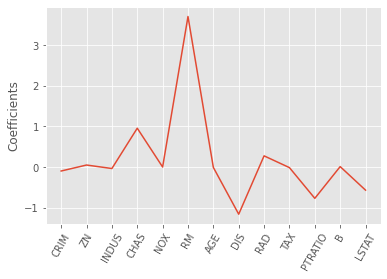

In [30]:
names = boston_.drop('MEDV',axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X,y).coef_

plt.plot(range(len(names)), lasso_coef)
plt.xticks(range(len(names)), names,rotation=60)
plt.ylabel('Coefficients')
plt.show()



Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.

### Model Complexity Curve for Ridge Regression

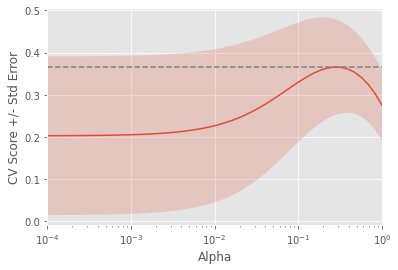

In [31]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
    
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge,X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)


# Chapter 3: Fine-tuning your model

- High Precision: Not many real emails predicted as spam
- High Recall: Predicted most spam emails correctly

In [32]:
y_test.shape, y_pred.shape

((152, 1), (152, 1))

In [33]:
from sklearn.model_selection import train_test_split
X = iris['data']
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

# For all metrics in Scikit-learn first argument is always true labels, and the second argument is the predicted ones

[[15  0  0]
 [ 0 14  1]
 [ 0  1 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.93      0.93      0.93        15
           2       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



###  Logistic Regression and the ROC Curve
- Logistic Regression outputs probabilities, there is a threshold to determine label.
- Logistic Regression produce linear decision boundary

In [35]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Probability Thresholds
- By default, logistic regression threshold = 05. Others model too have threshold --> 0.5
- What happens if we vary this threshold ?


### The ROC Curve
- See what happens if we vary the threshold using ROC Curve

### Plotting the ROC curve (binary problem)

In [36]:
# from sklearn.metrics import roc_curve
# y_pred_prob = logreg.predict_proba(X_test)[:,1]
# fpr,tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plt.plot([0,1], [0,1], 'k--')
# plt.plot(fpr,tpr, label='Logistic Regression')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve')
# plt.show();

### Area under the ROC curve
- Large area under the ROC curve = better model

In [40]:
from sklearn.metrics import roc_auc_score
# roc_auc_score(y_test, y_pred_prob)
# cv_scores = cross_val_score(logreg,X,y,cv=5, scoring='roc_auc')

### Hyperparameter tuning
- Parameters like alpha and k: Hyperparameters
- Hyperparameters cannot be learned by fitting the model


### Choosing the correct Hyperparameter
- Try a bunch of different hyperparameter
- Fit all of them separately
- See how well each performs
- Choose the best performing one
- It is essential to use cross-validation

In [43]:
from sklearn.model_selection import GridSearchCV
from sklear.model_selection import RandomizedSearchCV

param_grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X,y)
knn_cv.best_params_ , knn_cv.best_score_


({'n_neighbors': 6}, 0.9800000000000001)

- In logistic regression there is C hyperparameter that control the regularization by inversely !
- Logistic regression has penalty hyperparameters l1 or l2 for regularization
- There is elastic net regularization for regression, the penalty term is a linear combination of the L1 and L2 penalties. --> l1_ratio

In [46]:
boston = datasets.load_boston()
boston_ = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_['MEDV'] = boston.target
X = boston_.drop('MEDV', axis=1).values
y = boston_['MEDV'].values

In [47]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train,y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3574.2674952346874, tolerance: 2.138958896694215
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3675.4850294526013, tolerance: 2.106010169421488
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3483.8291808692197, tolerance: 1.9782090743801652
  positive)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3883.857

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.6637648307263888
Tuned ElasticNet MSE: 25.53490371495734


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4552.42532829092, tolerance: 2.7035694125412544
  positive)


## Chapter 4: Preprocessing and pipelines

### Dealing with categorical features
1. Scikit-learn will not accept categorical features by default
2. Need to encode categorical features numerically
3. Convert to Dummy Variables, for instance one column called origin its values are US,Europe, and Asia. You create dummy variables, but you don't have to create 3 dummies just 2 of them. Because it will duplicate some information, which maybe give issue to some model.

- scikit-learn: OneHotEncoder()
- pandas: get_dummies()

In [50]:
# df_origin = pd.get_dummies(df)
# df_region = pd.get_dummies(df, drop_first=True) --> drop unneeded dummy variable

Boxplot are particulary useful for visualizing categorical features with numeric features

In [51]:
# df.boxplot('life', 'Region', rot=60)

### Handling missing data
- Missing values can be question mark, 0,-1,etc

In [ ]:
# df.columns.replace(0, np.nan, inplace=True)
# df= df.dropna() --> drop nan columns

### Imputing missing data
- Making an educated guess about the missing values
- Example: Using the mean of the non-missing entries

In [ ]:
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values='NaN', strategies='mean',axis=0)
# imp.fit(X)
# X = imp.transform(X)

### Imputing within a pipeline

In [52]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import Imputer
# imp = Imputer(missing_values = 'NaN', strategy='mean',axis=0)
# logreg = LogisticRegression()
# steps = [('imputation', imp), ('logistic_regression', logreg)]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state =42)

# pipeline.fit(X_train,y_train)
# y_pred = pipeline.predict(X_test)
# pipeline.score(X_test, y_test)

Remember each step must be transformer and the last must be an estimator, see what strategies we can do for Imputer !

### Centering and Scaling
- Many models use some form of distance to inform them
- Features on larger scales can unduly infuence the model
- k-NN uses distance explicitly when making predictions
- Normalizing to overcome

### Ways to normalize your data
- Standardization: Subtract the mean and divide by variance
- All features are centered around zero and have variance one
- Can also subtract the minimum and divide by the range
- Minimum zero and maximum one

In [53]:
# from sklearn.preprocessing import scale
# X_scaled = scale(X)
# np.mean(X), np.std(X)

In [54]:
# np.mean(X_scaled), np.std(X_scaled)

### Scaling in pipeline

In [55]:
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
# pipeline = Pipeline(steps)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state =42)

# knn_scaled = pipeline.fit(X_train,y_train)
# y_pred = pipeline.predict(X_test)
# accuracy_score(y_test, y_pred)

In [56]:
# knn_unscaled = KNeighborsClassifier().fit(X_train,y_train)
# knn_unscaled.score(X_test,y_test)

### CV and scaling in a pipeline

In [59]:
# steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier())]
# pipeline = Pipeline(steps)
# parameters = {knn_n_neighbors: np.arange(1,50)}
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3 , random_state =42)
# cv = GridSearchCV(pipeline, param_grid = parameters)
# cv.fit(X_train, y_train)
# y_pred = cv.predict(X_test)

In [58]:
# print(cv.best_params_)
# print(cv.score(X_test,y_test))
# print(classification_report(y_test,y_pred))

### BRINGING IT ALL TOGETHER CODE !

#### Classification

In [ ]:
# # Setup the pipeline
# steps = [('scaler', StandardScaler()),
#          ('SVM', SVC())]

# pipeline = Pipeline(steps)

# # Specify the hyperparameter space
# parameters = {'SVM__C':[1, 10, 100],
#               'SVM__gamma':[0.1, 0.01]}

# # Create train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=21)

# # Instantiate the GridSearchCV object: cv
# cv = GridSearchCV(pipeline,param_grid= parameters)
# # Fit to the training set
# cv.fit(X_train, y_train)

# # Predict the labels of the test set: y_pred
# y_pred = cv.predict(X_test)
# # Compute and print metrics
# print("Accuracy: {}".format(cv.score(X_test, y_test)))
# print(classification_report(y_test, y_pred))
# print("Tuned Model Parameters: {}".format(cv.best_params_))


#### Regression

In [ ]:
# # Setup the pipeline steps: steps
# steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
#          ('scaler', StandardScaler()),
#          ('elasticnet', ElasticNet())]

# # Create the pipeline: pipeline 
# pipeline = Pipeline(steps)

# # Specify the hyperparameter space
# parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# # Create train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=42)

# # Create the GridSearchCV object: gm_cv
# gm_cv = GridSearchCV(pipeline, param_grid= parameters)

# # Fit to the training set
# gm_cv.fit(X_train,y_train)

# # Compute and print the metrics
# r2 = gm_cv.score(X_test, y_test)
# print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
# print("Tuned ElasticNet R squared: {}".format(r2))
